In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test=pd.read_csv(r"C:\Users\sumes\OneDrive\Desktop\KAGGLE PROJECT\house-prices-advanced-regression-techniques\test.csv")

In [6]:
df_test.shape

(1459, 80)

In [36]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [11]:
sns.heatmap(df_test.isnull())

In [26]:
df_test_1=df_test.isnull().sum().apply(lambda x : x if x>800 else 'Nan')

In [45]:
df_test_2=df_test_1[df_test_1!='Nan']
df_test_2

C:\Users\sumes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [42]:
for col in df_test_2.index:
    df_test.drop([col],axis=1,inplace=True)
    

In [46]:
df_test_1=df_test.isnull().sum().apply(lambda x : x if x>0 else 'Nan')

In [47]:
df_test_2=df_test_1[df_test_1!='Nan']
df_test_2

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: object

In [48]:
for num in df_test_2.index:
    for col in df_test.select_dtypes(['object']).columns:
        if num==col:
            df_test[col]=df_test[col].fillna(df_test[col].mode()[0])

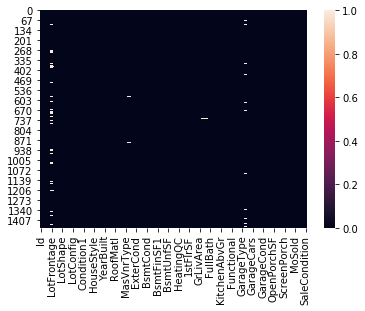

In [50]:
sns.heatmap(df_test.isnull())

In [51]:
df_test_3=df_test.isnull().sum().apply(lambda x : x if x>0 else 'Nan')
df_test_4=df_test_1[df_test_3!='Nan']
df_test_4

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: object

In [52]:
for num in df_test_4.index:
    df_test[num]=df_test[num].fillna(df_test[num].mean())

In [54]:
sns.heatmap(df_test.isnull())

In [55]:
df_test.shape

(1459, 76)

In [56]:
count=0
for col in df_test.select_dtypes(['object']).columns:
    count=count+1
print(count)  

39


In [57]:
df_test.to_csv('formulated.csv',index=False)

In [59]:
pwd

'C:\\Users\\sumes\\Downloads'

In [60]:
df_test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   

  LandContour Utilities LotConfig      ...       OpenPorchSF EnclosedPorch  \
0         Lvl    AllPub    Inside      ...                 0             0   
1         Lvl    AllPub    Corner      ...                36             0   
2         Lvl    AllPub    Inside      ...                34             0   
3         Lvl    AllPub    Inside      ...                36             0   
4         HLS    AllPub    Inside      ...                82             0   

  3SsnPorch ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  \
0         0         120        0       0       6    2010        WD   
1         0           0        0   12500       6    2010        WD   
2         0           0        0       0       3    2010        WD   
3         0           0        0       0       6    2010        WD   
4         0         144        0       0       1    2010        WD   

   SaleCondition  
0         Normal  
1         Normal  
2         Normal  
3         Normal  
4         Normal  

[5 rows x 76 columns]